In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

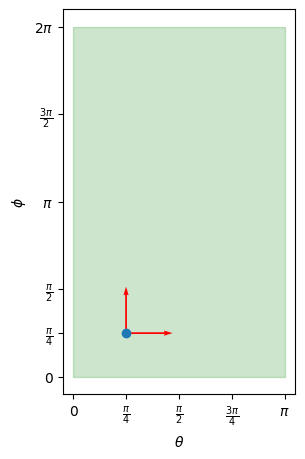

In [2]:
thetad = np.linspace(0, np.pi, 100)
phid = 2*np.pi*np.ones(len(thetad))

theta0 = np.pi/4
phi0 = np.pi/4

plt.figure(figsize=(3,5))
plt.fill_between(thetad, 0, phid, color='g', alpha=0.2)
plt.quiver(np.pi/4, np.pi/4,1,0,scale=5, color='red')
plt.quiver(np.pi/4, np.pi/4,0,1,scale=5, color='red')
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
            [0, r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"])
plt.yticks([0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
            [0, r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.scatter(theta0, phi0)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.show()

In [3]:
theta, phi = sp.symbols("theta phi", real=True)
x = sp.sin(theta)*sp.cos(phi)
y = sp.sin(theta)*sp.sin(phi)
z = sp.cos(theta)
# X = (x,y,z)
X = sp.Matrix([x,y,z])

In [4]:
dX = X.jacobian([theta, phi])
dX

Matrix([
[cos(phi)*cos(theta), -sin(phi)*sin(theta)],
[sin(phi)*cos(theta),  sin(theta)*cos(phi)],
[        -sin(theta),                    0]])

In [5]:
# Ta mal
# X = (x,y,z)
# dX = [[sp.diff(x, theta), sp.diff(x, phi)], [sp.diff(y, theta), sp.diff(y, phi)], [sp.diff(2, theta), sp.diff(2, phi)]]
# dX = sp.Matrix(dX)
# dX

In [6]:
dX_tetha = sp.MatMul(dX, sp.Matrix([1,0]), evaluate=True)
dX_tetha

Matrix([
[cos(phi)*cos(theta)],
[sin(phi)*cos(theta)],
[        -sin(theta)]])

In [7]:
dX_phi = sp.MatMul(dX, sp.Matrix([0,1]), evaluate=True)
dX_phi

Matrix([
[-sin(phi)*sin(theta)],
[ sin(theta)*cos(phi)],
[                   0]])

# Verificacion

In [8]:
[sp.diff(x, theta), sp.diff(y, theta), sp.diff(z, theta)]

[cos(phi)*cos(theta), sin(phi)*cos(theta), -sin(theta)]

In [9]:
[sp.diff(x, phi), sp.diff(y, phi), sp.diff(z, phi)]

[-sin(phi)*sin(theta), sin(theta)*cos(phi), 0]

In [10]:
# substitute the point p = (pi/2,0)
X.subs([(theta, np.pi/2), (phi, 0)])
# round 2 decimals
sp.Matrix([round(i,2) for i in X.subs([(theta, np.pi/2), (phi, 0)])])

Matrix([
[1.0],
[  0],
[  0]])

In [11]:
# substitute the point p = (pi/2,0) in dX_theta
dX_tetha.subs([(theta, np.pi/2), (phi, 0)])
# round 2 decimals
sp.Matrix([round(i,2) for i in dX_tetha.subs([(theta, np.pi/2), (phi, 0)])])

Matrix([
[   0],
[   0],
[-1.0]])

In [12]:
# substitute the point p = (pi/2,0) in dX_phi
dX_phi.subs([(theta, np.pi/2), (phi, 0)])
# round 2 decimals
sp.Matrix([round(i,2) for i in dX_phi.subs([(theta, np.pi/2), (phi, 0)])])

Matrix([
[  0],
[1.0],
[  0]])

In [13]:
# check orthogonality
sp.simplify(dX_tetha.dot(dX_phi))

0

# Vectores tangentes sobre la esfera

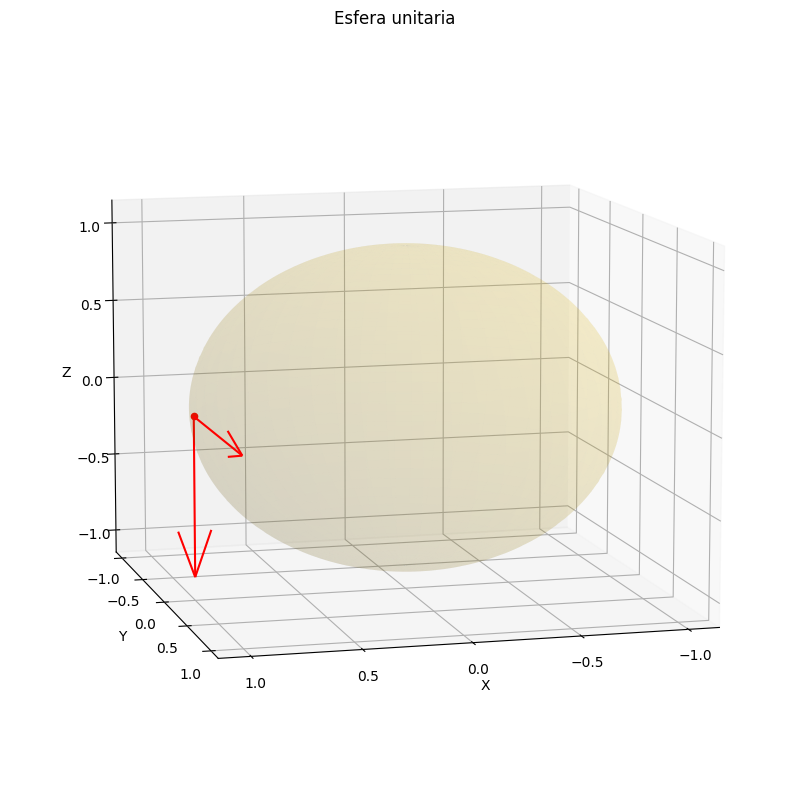

In [14]:
theta0 = np.pi/2
phi0 = 0

dX_theta0 = dX_tetha.subs([(theta, theta0), (phi, phi0)])
dX_phi0 = dX_phi.subs([(theta, theta0), (phi, phi0)])

def sphere(r):
    u = np.linspace(0, 2*np.pi, 200)
    v = np.linspace(0, np.pi, 200)
    d = (r) * np.outer(np.cos(u), np.sin(v))
    e = (r) * np.outer(np.sin(u), np.sin(v))
    f = (r) * np.outer(np.ones(np.size(u)), np.cos(v))
    return d, e, f

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_zlabel('Z')
ax.set_title('Esfera unitaria')
d,e,g = sphere(1)
ax.plot_surface(d, e, g,  color= (1,0.8,0,0.1))
ax.scatter(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), color='red')
ax.quiver(sp.sin(theta0) * sp.cos(phi0), sp.sin(theta0) * sp.sin(phi0), sp.cos(theta0), dX_theta0[0], dX_theta0[1], dX_theta0[2], color='red')
ax.view_init(elev=10, azim=75)
ax.quiver(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), dX_phi0[0], dX_phi0[1], dX_phi0[2], color='red')
plt.show()

# Coeficienteas primera forma normal

In [15]:
E = dX_tetha.dot(dX_tetha).simplify()
E

1

In [16]:
F = dX_tetha.dot(dX_phi).simplify()
F

0

In [17]:
G = dX_phi.dot(dX_phi).simplify()
G

sin(theta)**2

Funcion de Area

$$dA = \sqrt{EG -F ^2}$$

In [18]:
dA = sp.sqrt(E*G - F**2).simplify()
dA

Abs(sin(theta))

Area de la esfera

$$A(S^2) = \iint_{U} \sqrt{EG-F^2}d\phi d\theta = \int_{0}^{\pi}\int_{0}^{2\pi}sin\theta d\phi d\theta$$

In [19]:
sp.integrate(dA, (theta,0, sp.pi), (phi,0, 2*sp.pi))

4*pi

Longitud de arco

$$S = \int _{t_0}^{tf} \sqrt{E(\theta')^2+2F(\theta'\phi') + G(\phi')^2} dt= \int _{t_0}^{tf} \sqrt{(\theta')^2+\sin^2\theta(\phi')^2} dt$$

sin(theta)**2

# Ejemplo Curvas Loxodromicas

Curvas sobre la esfera que mantienen constante el angulo respecto a los meridianos
**Meridiano -> $\phi$ cont**
la curva $\alpha(t)$ es la imagen $\vec{X}(\theta(t), \phi(t))$

$$\alpha'(t) = \frac{d\vec{X}}{dt}=\vec{X_{\theta}}\theta'+\vec{X_{\phi}}\phi'$$

Sea $\beta$ el angulo entre $\alpha'(t)$ y los meridianos, entonces $\alpha(t)$ satisface:
$$\cos\beta = \frac{<\vec{X_{\theta}, \alpha'(t)}>}{||\vec{X_{\theta}}|| ||{\alpha'(t)}||$$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=64223e87-f482-4de0-a06c-0f5a66137cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>